# Dataset Analysis

## Objective
Predict Miles Per Gallon based on given data. <br>


<h3>Data Dictionary</h3>
<br>
<li><b>mpg</b> - Average <b>M</b>iles <b>P</b>er <b>G</b>allon</li>
<li><b>cylinders</b> - The amount of cylinders in the cars engine. More cylinders usually means faster car. </li>
<li><b>displacement</b> - Amount of air car can displalce/move </li>
<li><b>horsepower</b> - The end result of some calculations to determine engine power for the car.</li>
<li><b>weight</b> - The weight of the car in lbs. </li>
<li><b>accelertion</b> - Cars rate of change regarding velocity with respect to time</li>
<li><b>model year</b> - Year the car was made.</li>
<li><b>origin</b> - Continent car was manufactured in. Key = [1 - America , 2 - Europe , 3 - Asia]</li>

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the .csv File

In [2]:
mpgFrame = pd.read_csv('auto-mpg.csv')

### Graph Formating & Auto Show

In [3]:
# sets background
sns.set(color_codes=True)
# shows graph 
%matplotlib inline

## Data Overview

In [4]:
# pull random sample of 10 from data
mpgFrame.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
312,37.2,4,86.0,65,2019,16.4,80,3,datsun 310
79,26.0,4,96.0,69,2189,18.0,72,2,renault 12 (sw)
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
265,17.5,8,318.0,140,4080,13.7,78,1,dodge magnum xe
150,26.0,4,108.0,93,2391,15.5,74,3,subaru
252,19.2,6,231.0,105,3535,19.2,78,1,pontiac phoenix lj
313,28.0,4,151.0,90,2678,16.5,80,1,chevrolet citation
166,13.0,8,302.0,129,3169,12.0,75,1,ford mustang ii
288,18.2,8,318.0,135,3830,15.2,79,1,dodge st. regis
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


Observation: 9 categories; 8 numeric, 1 categorical

In [5]:
# show rows, then columns of dataframe
mpgFrame.shape

(398, 9)

Obervation: 398 rows, 9 Columns

In [6]:
# find unique values for each column
mpgFrame.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

Observation: There is alarmingly 305 unique car names for 398 possible car entries

In [7]:
# checking for missing data
mpgFrame.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Observation: There is no 'NaN' values from the .csv file

In [8]:
# Checking for duplicated data and adding up the 'True' values.
mpgFrame.duplicated().sum()

0

Observation: There is no data duplicate data

In [9]:
# Check each column for what data type it may hold
mpgFrame.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Observation: All data is numeric except 'car name'

In [10]:
# get some descripgive statistics on the columns, hence the 'T' at end
mpgFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Observation: The data doesn't seem too spread out. Also the cars are all old (car year made < 1985). It is possible that there may be a couple outliers.

In [11]:
# Looking at the possible correlations
mpgFrame.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


Observation: There is strong correlation between displacement & cylinders 0.95. There is also good correlation with weight & cylinders. There could be a case that orgin & model year correlate with mpg - 0.56, 0.58.

###  Observations All together

There is no initial duplicate data <br>
There is no data field with missing values 'NaN' <br>
Outliers may be present <br>
There is 398 rows & 9 columns <br>
Out of the 398 possible entries, there is over 300 unique car names <br>
Cylinders, weight, & displacement all have strong correlation.<br>
All cars are vintige ( 1969 < cars < 1983 )

# Data Preprocessing

####  No missing values to worry about 

### Data Inconsistencies

##### - Plan of Action
I'm going to first check and make sure there is no strings or crazy numbers in the numeric columns. Maybe even numbers that make no sense or are impossible too.

In [12]:
# User Defined Function for better Readability 

def vibeCheck (dataFrame, columnName):
    
    df = dataFrame.sort_values(by=columnName, ascending=False)
    columnUnique = df[columnName].unique()
    
    #Pretty Printing the total number of unique values
    print(f' Total Values - > {df[columnName].nunique()}')
    
    return (columnUnique)

In [13]:
# Making sure all possible mpg data is good
vibeCheck(mpgFrame, 'mpg')

 Total Values - > 129


array([46.6, 44.6, 44.3, 44. , 43.4, 43.1, 41.5, 40.9, 40.8, 39.4, 39.1,
       39. , 38.1, 38. , 37.7, 37.3, 37.2, 37. , 36.4, 36.1, 36. , 35.7,
       35.1, 35. , 34.7, 34.5, 34.4, 34.3, 34.2, 34.1, 34. , 33.8, 33.7,
       33.5, 33. , 32.9, 32.8, 32.7, 32.4, 32.3, 32.2, 32.1, 32. , 31.9,
       31.8, 31.6, 31.5, 31.3, 31. , 30.9, 30.7, 30.5, 30. , 29.9, 29.8,
       29.5, 29. , 28.8, 28.4, 28.1, 28. , 27.9, 27.5, 27.4, 27.2, 27. ,
       26.8, 26.6, 26.5, 26.4, 26. , 25.8, 25.5, 25.4, 25.1, 25. , 24.5,
       24.3, 24.2, 24. , 23.9, 23.8, 23.7, 23.6, 23.5, 23.2, 23. , 22.5,
       22.4, 22.3, 22. , 21.6, 21.5, 21.1, 21. , 20.8, 20.6, 20.5, 20.3,
       20.2, 20. , 19.9, 19.8, 19.4, 19.2, 19.1, 19. , 18.6, 18.5, 18.2,
       18.1, 18. , 17.7, 17.6, 17.5, 17. , 16.9, 16.5, 16.2, 16. , 15.5,
       15. , 14.5, 14. , 13. , 12. , 11. , 10. ,  9. ])

In [14]:
# Making sure all displacement data is good
vibeCheck(mpgFrame, 'displacement')

 Total Values - > 82


array([455. , 454. , 440. , 429. , 400. , 390. , 383. , 360. , 351. ,
       350. , 340. , 318. , 307. , 305. , 304. , 302. , 267. , 262. ,
       260. , 258. , 250. , 232. , 231. , 225. , 200. , 199. , 198. ,
       183. , 181. , 173. , 171. , 168. , 163. , 156. , 155. , 151. ,
       146. , 145. , 144. , 141. , 140. , 135. , 134. , 131. , 130. ,
       122. , 121. , 120. , 119. , 116. , 115. , 114. , 113. , 112. ,
       111. , 110. , 108. , 107. , 105. , 104. , 101. , 100. ,  98. ,
        97.5,  97. ,  96. ,  91. ,  90. ,  89. ,  88. ,  86. ,  85. ,
        83. ,  81. ,  80. ,  79. ,  78. ,  76. ,  72. ,  71. ,  70. ,
        68. ])

In [15]:
# Making sure all cylinders data is good
vibeCheck(mpgFrame, 'cylinders')

 Total Values - > 5


array([8, 6, 5, 4, 3], dtype=int64)

In [16]:
# Making sure all weight data is good
vibeCheck(mpgFrame, 'weight')

 Total Values - > 351


array([5140, 4997, 4955, 4952, 4951, 4906, 4746, 4735, 4732, 4699, 4668,
       4657, 4654, 4638, 4633, 4615, 4502, 4499, 4498, 4464, 4457, 4456,
       4440, 4425, 4422, 4385, 4382, 4380, 4376, 4363, 4360, 4354, 4341,
       4335, 4325, 4312, 4295, 4294, 4278, 4274, 4257, 4237, 4220, 4215,
       4209, 4190, 4165, 4154, 4141, 4140, 4135, 4129, 4100, 4098, 4096,
       4082, 4080, 4077, 4060, 4055, 4054, 4042, 3988, 3962, 3955, 3940,
       3907, 3900, 3897, 3892, 3880, 3870, 3850, 3840, 3830, 3821, 3820,
       3785, 3781, 3777, 3761, 3755, 3735, 3730, 3725, 3693, 3672, 3664,
       3651, 3645, 3632, 3630, 3620, 3613, 3609, 3605, 3574, 3570, 3563,
       3535, 3530, 3525, 3520, 3504, 3465, 3459, 3449, 3445, 3439, 3436,
       3433, 3432, 3430, 3425, 3420, 3415, 3410, 3399, 3381, 3380, 3365,
       3360, 3353, 3336, 3329, 3302, 3288, 3282, 3278, 3270, 3265, 3264,
       3250, 3245, 3233, 3230, 3221, 3211, 3210, 3205, 3193, 3190, 3169,
       3160, 3158, 3155, 3150, 3140, 3139, 3121, 31

In [17]:
# Making sure all acceleration data is good
vibeCheck(mpgFrame, 'acceleration')

 Total Values - > 95


array([24.8, 24.6, 23.7, 23.5, 22.2, 22.1, 21.9, 21.8, 21.7, 21.5, 21. ,
       20.7, 20.5, 20.4, 20.1, 19.9, 19.6, 19.5, 19.4, 19.2, 19. , 18.8,
       18.7, 18.6, 18.5, 18.3, 18.2, 18.1, 18. , 17.9, 17.8, 17.7, 17.6,
       17.5, 17.4, 17.3, 17.2, 17.1, 17. , 16.9, 16.8, 16.7, 16.6, 16.5,
       16.4, 16.2, 16.1, 16. , 15.9, 15.8, 15.7, 15.6, 15.5, 15.4, 15.3,
       15.2, 15.1, 15. , 14.9, 14.8, 14.7, 14.5, 14.4, 14.3, 14.2, 14.1,
       14. , 13.9, 13.8, 13.7, 13.6, 13.5, 13.4, 13.2, 13. , 12.9, 12.8,
       12.6, 12.5, 12.2, 12.1, 12. , 11.6, 11.5, 11.4, 11.3, 11.2, 11.1,
       11. , 10.5, 10. ,  9.5,  9. ,  8.5,  8. ])

In [18]:
# Making sure all model year data is good
vibeCheck(mpgFrame, 'model year')

 Total Values - > 13


array([82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70], dtype=int64)

In [19]:
# Making sure all origin data is good
vibeCheck(mpgFrame, 'origin')

 Total Values - > 3


array([3, 2, 1], dtype=int64)

In [20]:
# Making sure all horsepower data is good
vibeCheck(mpgFrame, 'horsepower')

 Total Values - > 94


array(['?', '98', '97', '96', '95', '94', '93', '92', '91', '90', '89',
       '88', '87', '86', '85', '84', '83', '82', '81', '80', '79', '78',
       '77', '76', '75', '74', '72', '71', '70', '69', '68', '67', '66',
       '65', '64', '63', '62', '61', '60', '58', '54', '53', '52', '49',
       '48', '46', '230', '225', '220', '215', '210', '208', '200', '198',
       '193', '190', '180', '175', '170', '167', '165', '160', '158',
       '155', '153', '152', '150', '149', '148', '145', '142', '140',
       '139', '138', '137', '135', '133', '132', '130', '129', '125',
       '122', '120', '116', '115', '113', '112', '110', '108', '107',
       '105', '103', '102', '100'], dtype=object)

Observation: '?' doesn't belong

#### Fixing  Horsepower

In [21]:
#replacing value with 'NaN'
mpgFrame['horsepower'] = mpgFrame['horsepower'].replace("?",np.nan)

#changing column to float
mpgFrame['horsepower'] = mpgFrame['horsepower'].apply(lambda x: float(x))

# getting amount that are now NaN
mpgFrame['horsepower'].isnull().sum()

6

In [22]:
# checking rows and storing 
mpgFrame[mpgFrame['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


Plan: I'm going to replace the 6 NaN values with the median as the data is skewed. 

In [23]:
# getting the median
horseMed = mpgFrame['horsepower'].median()

In [24]:
# filling the NaN
mpgFrame['horsepower'].fillna(horseMed, inplace=True)

##### Thoughts so far

It looks like all the numeric data is good to go and consistant now. I have yet to sort out the car names. I'm planning on standardizing the names since 300+ is too hard to draw conclusions from. Also, I plan on dropping zero of the columns. This is because all of the columns have at least "moderate correlation" with another.

#### Figuring out the Car Name Issue

In [25]:
# Checking the names of the cars
vibeCheck(mpgFrame, 'car name')

 Total Values - > 305


array(['vw rabbit custom', 'vw rabbit c (diesel)', 'vw rabbit',
       'vw pickup', 'vw dasher (diesel)', 'volvo diesel', 'volvo 264gl',
       'volvo 245', 'volvo 244dl', 'volvo 145e (sw)', 'volvo 144ea',
       'volkswagen type 3', 'volkswagen super beetle',
       'volkswagen scirocco', 'volkswagen rabbit l',
       'volkswagen rabbit custom diesel', 'volkswagen rabbit custom',
       'volkswagen rabbit', 'volkswagen model 111', 'volkswagen jetta',
       'volkswagen dasher', 'volkswagen 411 (sw)',
       'volkswagen 1131 deluxe sedan', 'vokswagen rabbit',
       'triumph tr7 coupe', 'toyouta corona mark ii (sw)',
       'toyota tercel', 'toyota starlet', 'toyota mark ii',
       'toyota cressida', 'toyota corona mark ii',
       'toyota corona liftback', 'toyota corona hardtop', 'toyota corona',
       'toyota corolla tercel', 'toyota corolla liftback',
       'toyota corolla 1600 (sw)', 'toyota corolla 1200',
       'toyota corolla', 'toyota celica gt liftback', 'toyota celica gt'

##### What I'm going to do with all these names
Originally, it took me multiple runs of the code below to get all the major names sorted. Now that I'm coming back to optimize my code a bit, I combined all the names in one list.

In [26]:
# List of the categories I'm going to throw a value into
majorBrand = [
    'Toyota','Pontiac', 'Chevrolet', 'Dodge', 'Buick', 'Mercury', 'Ford', 'Chrysler', 
    'Plymouth', 'AMC', 'Oldsmobile', 'Audi','Datsun','Mazda','Volkswagen','Volvo','Nissan',
    'Mazda','Honda','Fiat','Peugeot', 'Cadillac', 'Subaru', 'BMW', 'Mercedes', 'Renault', 
    'Saab','Opel', 
            ]

# Iterates through the majorBrand list and searches for a value that contains the same spelling in some part. If it does,-
# -it changes it's value to the one in the list. Not case sensitive but must be spelled correctly
for item in majorBrand:
    mpgFrame.loc[mpgFrame['car name'].str.contains(item, case=False), 'car name'] = item

##### Next Step
Now that all the major brand names are standardized. I must now see what data is inconsistant.

In [27]:
#Checks the values of the car name column that are unique and outputs the ones that are not in the list previously

def theVerification (dataFrame, columnName, listName):
    
    for item in dataFrame[columnName].unique():
        if item not in listName:
            
            print(item, end=', ')

# calling function
theVerification(mpgFrame, 'car name', majorBrand)

chevy c20, hi 1200d, toyouta corona mark ii (sw), maxda rx3, chevroelt chevelle malibu, capri ii, vw rabbit, chevy c10, vw rabbit custom, maxda glc deluxe, vw rabbit c (diesel), vw dasher (diesel), vokswagen rabbit, triumph tr7 coupe, vw pickup, chevy s-10, 

Observation: Looks like there is slang terms for vehicles and abreviations. Some are spelled wrong too.

In [28]:
## Throwing the slang names and misspellings into their respected categories

#Chevrolet 
mpgFrame.loc[mpgFrame['car name'].str.contains('chevy|chevroelt|chevroelt', case=False), 'car name'] = 'Chevrolet'

#Volkswagen 
mpgFrame.loc[mpgFrame['car name'].str.contains('vw|vokswagen', case=False), 'car name'] = 'Volkswagen'

#Mazda 
mpgFrame.loc[mpgFrame['car name'].str.contains('maxda', case=False), 'car name'] = 'Mazda'

#Toyota 
mpgFrame.loc[mpgFrame['car name'].str.contains('toyouta', case=False), 'car name'] = 'Toyota'

In [29]:
# Checking what could possibly be left 
theVerification(mpgFrame, 'car name', majorBrand)

hi 1200d, capri ii, triumph tr7 coupe, 

###### Thoughts on the 3 solo cars
I'm going to investigate if these cars only appear once. I've never heard of these cars in my life and I had to do a Google search to make sure they were real. If these cars, or any in the column contain only one entry, I'm going to drop them from the dataframe. There is enough data in my opinion that it is better to do without the infrequent data. <b> A car brand must have a frequency of at least 2 to remain.</b>

In [30]:
# Finding which car names appear only once 
once = mpgFrame['car name'].value_counts()[mpgFrame['car name'].value_counts() == 1]
for item in once.index:
    print(item)

capri ii
hi 1200d
triumph tr7 coupe
Nissan


Note: I'm dropping the 4 car brands and their data from above

In [31]:
# this code removes the car brands who appeared only once (I stole this line of code)
mpgFrame = mpgFrame.groupby('car name').filter(lambda x: len(x) > 1)

#Resetting the dataframe index
mpgFrame.reset_index(drop=True, inplace=True)

In [32]:
# The double check
vibeCheck(mpgFrame, 'car name')

 Total Values - > 26


array(['Volvo', 'Volkswagen', 'Toyota', 'Subaru', 'Saab', 'Renault',
       'Pontiac', 'Plymouth', 'Peugeot', 'Opel', 'Oldsmobile', 'Mercury',
       'Mercedes', 'Mazda', 'Honda', 'Ford', 'Fiat', 'Dodge', 'Datsun',
       'Chrysler', 'Chevrolet', 'Cadillac', 'Buick', 'BMW', 'Audi', 'AMC'],
      dtype=object)

##### Notes before moving on
From this point on, the data should be consistant. Duplicate data was not present in the observation but it could be now that the car brand names are more standard. This will be investigated down the line.

#### Outliers

In [33]:
# User Defined Function to get some outlier stats
def theGoods(dataFrame, columnName):
    
    outliers = False
    holyItem = dataFrame[columnName]
    
    # '.values' stores the number in a numpy array instead of whatever pandas does
    q1 = holyItem.quantile([.25]).values
    q3 = holyItem.quantile([.75]).values
    IQR = q3 - q1
    lowerBounds = q1 - (1.5 * IQR)
    upperBounds = q3 + (1.5 * IQR)
    
    myList = list()
    
    # figures out if there are outliers and logs them in a list
    for item in holyItem:
        if item < lowerBounds or item > upperBounds:
            myList.append(item)
            outliers = True

    print(f'{columnName.upper()}\t Outliers? \t{outliers} -> {myList}')
    print(f'Q1 = {q1} Q3 = {q3} IQR ={IQR}')
    print(f'LowerBounds {lowerBounds} UpperBounds {upperBounds}')
    
    return(myList, lowerBounds, upperBounds)

#Return order -> list, lower, upper

In [34]:
# Taking a look at all the numeric columns
headers = mpgFrame.select_dtypes(include=np.number).columns

# Taking out of array into normal list so I can loop
myList = list()
for item in headers:
    myList.append(item)

# Taking the list and going ham on all columns
masterDict = dict()
for item in myList:
    #Storing all this data for future use
    masterDict[item] = theGoods(mpgFrame, item)
    #helping my eyes
    print('-' * 50)

MPG	 Outliers? 	True -> [46.6]
Q1 = [17.5] Q3 = [29.] IQR =[11.5]
LowerBounds [0.25] UpperBounds [46.25]
--------------------------------------------------
CYLINDERS	 Outliers? 	False -> []
Q1 = [4.] Q3 = [8.] IQR =[4.]
LowerBounds [-2.] UpperBounds [14.]
--------------------------------------------------
DISPLACEMENT	 Outliers? 	False -> []
Q1 = [101.75] Q3 = [262.] IQR =[160.25]
LowerBounds [-138.625] UpperBounds [502.375]
--------------------------------------------------
HORSEPOWER	 Outliers? 	True -> [220.0, 215.0, 225.0, 225.0, 215.0, 200.0, 210.0, 208.0, 215.0, 225.0, 230.0]
Q1 = [75.25] Q3 = [125.] IQR =[49.75]
LowerBounds [0.625] UpperBounds [199.625]
--------------------------------------------------
WEIGHT	 Outliers? 	False -> []
Q1 = [2223.75] Q3 = [3608.] IQR =[1384.25]
LowerBounds [147.375] UpperBounds [5684.375]
--------------------------------------------------
ACCELERATION	 Outliers? 	True -> [8.5, 8.5, 8.0, 23.5, 24.8, 23.7, 24.6]
Q1 = [13.8] Q3 = [17.175] IQR =[3.375

Observation/Plan: It looks like Acceleration & Miles Per Gallon are the only columns with outliers. I stored the data of upper bounds and lower bounds as well as what points were outliers in a dictionary. I'm going to use this to impute these outliers if necesary down the line. I'm going to check the distributions of the two columns first.

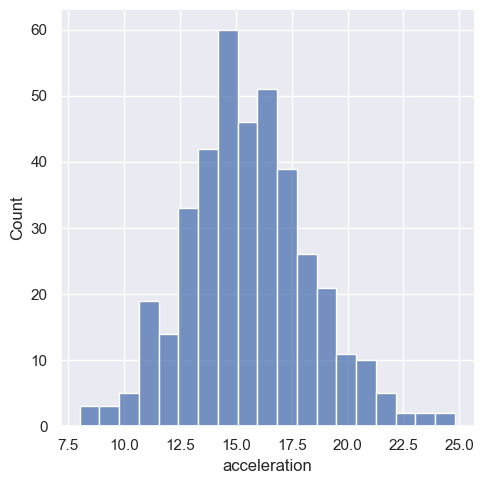

In [35]:
# Checking distribution of 'acceleration' before imputing
sns.displot(data=mpgFrame,x='acceleration')

Observation: It looks like the data is more normal than not. The outliers are not too far from the upper and lower bounds. It looks like I could even let the outliers stay in but I'm going to cap them at their closest respected bound to be safe.

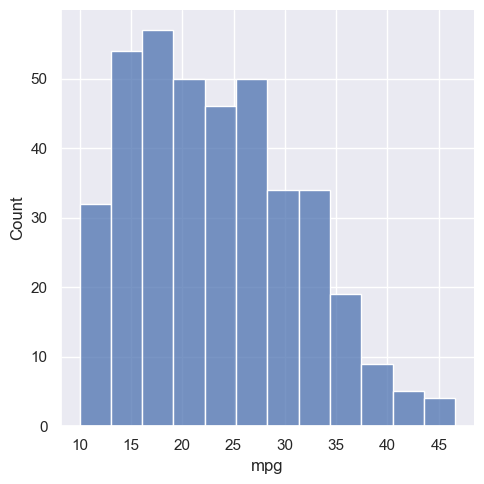

In [36]:
#Checking the distribution of 'MPG'
sns.displot(data=mpgFrame, x='mpg')

Observation/Conclusion: The mpg column has a skew to the right. I'm going to leave the single outlier in. It is very close to its bounds that I think it won't be to big of a deal

In [37]:
### Capping 'Acceleration'

## mastDict is dictionary from previous code masterDict([key][outliers,lower,upper][outlier position in array or 0])

# rounding off some numbers and getting 
uu = masterDict['acceleration'][2][0]
upper = np.round(uu, 2)
ll = masterDict['acceleration'][1][0]
lower = np.round(ll, 2)

# UPPER
mpgFrame.loc[mpgFrame['acceleration'] > upper, 'acceleration'] = upper

# LOWER
mpgFrame.loc[mpgFrame['acceleration'] < lower, 'acceleration'] = lower

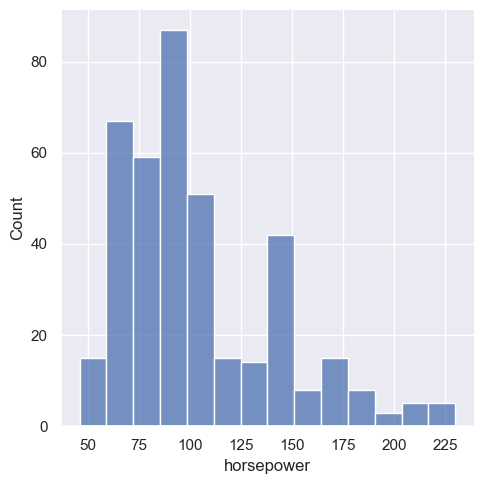

In [38]:
# Checking distribution of 'horsepower' before imputing
sns.displot(data=mpgFrame, x='horsepower')

Observation/Plan: data is skewed to the right and dropping the rows is not a great option. There is still data to be pulled from the rows so I'm going to go with what I know - capping the outlier to the nearest bound.

In [39]:
### Capping 'Horsepower'

## mastDict is dictionary from previous code masterDict([key][outliers,lower,upper][outlier position in array or 0])

# rounding off some numbers and getting 
uu = masterDict['horsepower'][2][0]
upper = np.round(uu, 2)

# UPPER
mpgFrame.loc[mpgFrame['horsepower'] > upper, 'horsepower'] = upper

Note: From this point on there should only be one outlier left in the data. 

#### Duplicate Data

In [40]:
# Checking for duplicates after changing up values
mpgFrame[mpgFrame.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


Note: Surprisingly, there is still no duplicate data. We are good to move onto the EDA.

# Exploratory Data Analysis

<b>Categorical</b> - 'car names', 'origin' <b>Numeric</b> - 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'

## Univariate Analysis

In [41]:
## I stole this from the instructor

# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the feature - number of rows
    count = data[feature].nunique() # unique values of the feature
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Categorical

##### Car Name

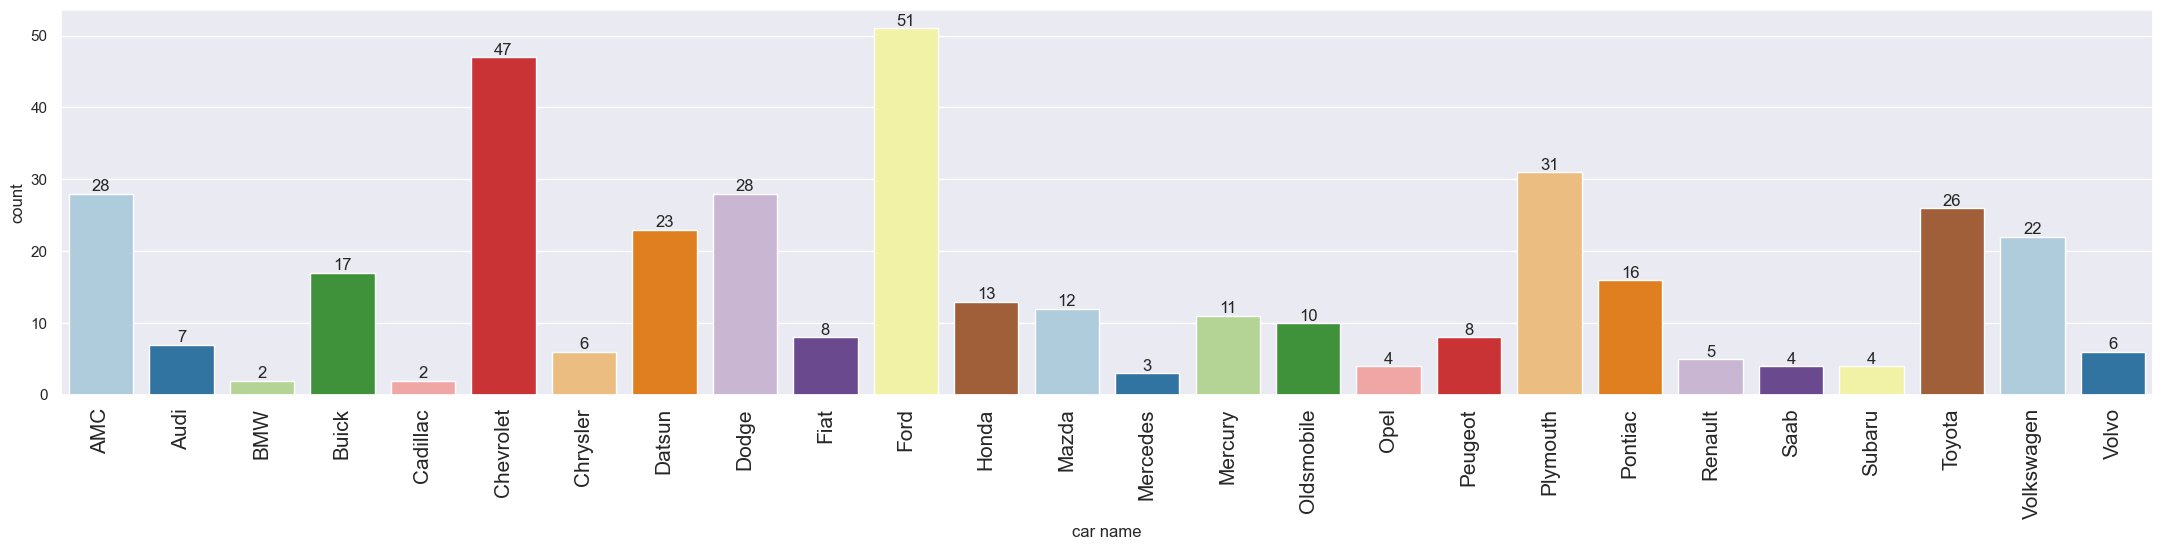

In [42]:
# displays frequency of brands
labeled_barplot(mpgFrame, 'car name',)

Observation: It looks like the top three brands in terms of frequency are Ford(51), Chevrolet(47), & Plymouth(31). The bottom three brands int terms of frequency are Cadillac(2), BMW(2), & Mercedes(3).

##### Origin 1 - America, 2 - Europe, 3 - Asia

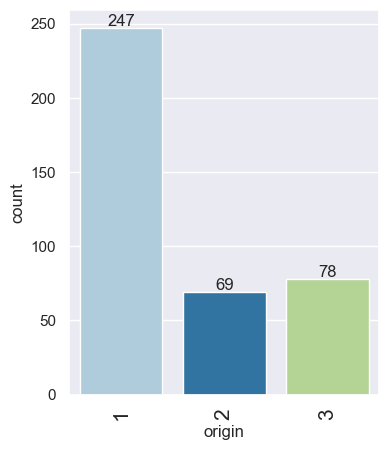

In [43]:
labeled_barplot(mpgFrame, 'origin',)

Observation: Most of the cars had an origin of America (1 - 247). Europe & Asia are close to each other but Europe had the least amount ( 2 - 69).

### Numeric


##### MPG

In [44]:
# descriptive stats
mpgFrame['mpg'].describe()

count    394.000000
mean      23.486802
std        7.774099
min       10.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

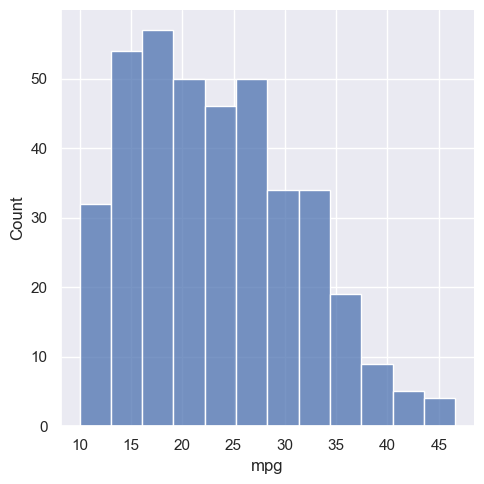

In [45]:
# see distribution
sns.displot(data=mpgFrame, x='mpg')

<AxesSubplot:xlabel='mpg'>

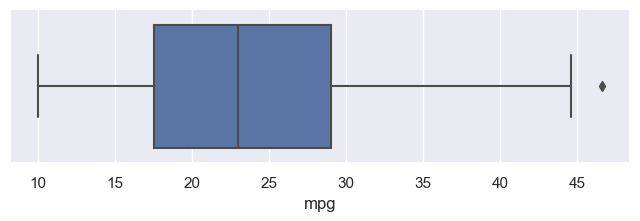

In [46]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='mpg')

MPG Observations: Unimodel, Mean of  Approx. 23.49 & Standard Deviation of Approx. 7.8. Skew to the right. One outlier as expected. Min 10, Max 46.6.

##### Cylinders

In [47]:
# descriptive stats
mpgFrame['cylinders'].describe()

count    394.000000
mean       5.459391
std        1.700060
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

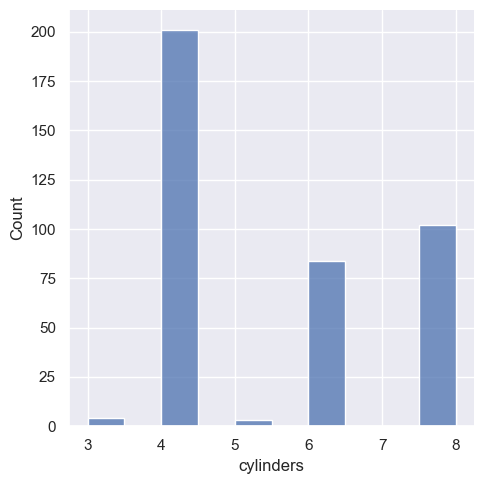

In [48]:
# see distribution
sns.displot(data=mpgFrame, x='cylinders')

<AxesSubplot:xlabel='cylinders'>

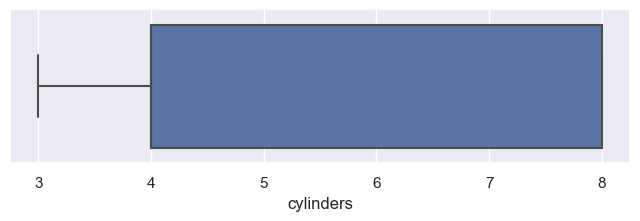

In [49]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='cylinders')

Observations: Unimodel, IQR touches upper bounds. Mean Approx. 5.5 & Standard Approx. 1.7. Min - 3 , Max - 8. No outliers.

##### Displacement

In [50]:
# descriptive stats
mpgFrame['displacement'].describe()

count    394.000000
mean     193.648477
std      104.487962
min       68.000000
25%      101.750000
50%      151.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

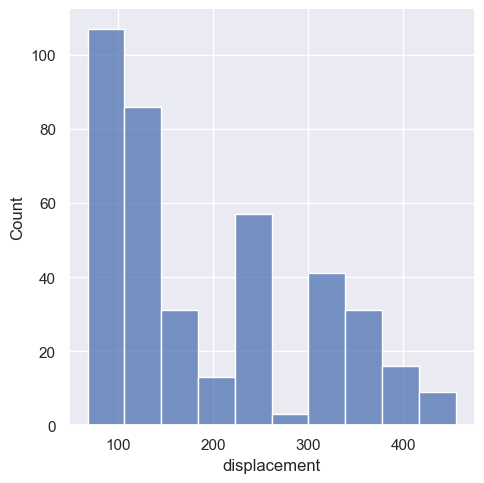

In [51]:
# see distribution
sns.displot(data=mpgFrame, x='displacement')

<AxesSubplot:xlabel='displacement'>

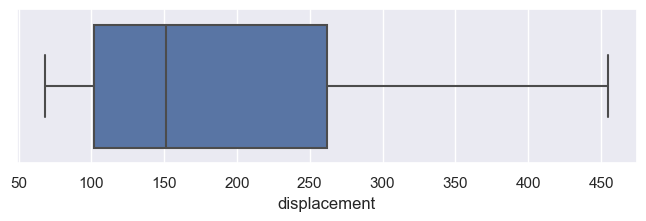

In [52]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='displacement')

Observations: Unimodel, right skew. No outliers. Mean Approx. 193.65. & Standard Deviation Approx. 104.49. Min - 68, Max - 455.

##### Horsepower

Horsepower took me a very long time to do because I missed it in the data preprocessing part. Turns out there was a '?' in the data that I didn't relize until getting the same error message for a while.

In [53]:
# Descriptive stats
mpgFrame['horsepower'].describe()

count    394.000000
mean     103.705127
std       36.741282
min       46.000000
25%       75.250000
50%       93.500000
75%      125.000000
max      199.620000
Name: horsepower, dtype: float64

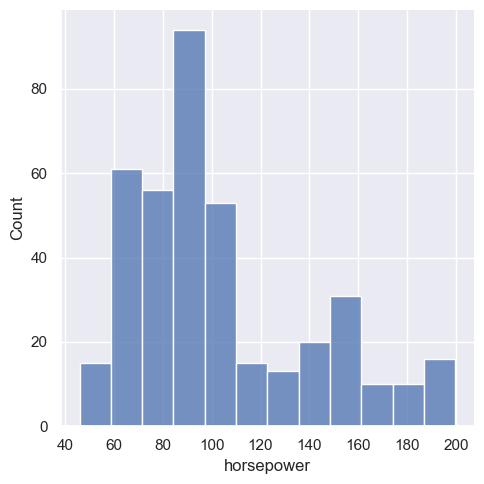

In [54]:
# see distribution
sns.displot(data=mpgFrame, x='horsepower')

<AxesSubplot:xlabel='horsepower'>

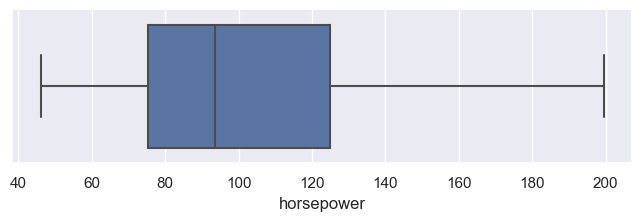

In [55]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='horsepower')

Observations: Unimodel (possibly due to imputing) skew right. No outliers (due to cap), Mean Approx 103.71 & Standard Deviation Approx. 36.7 . Min - 46 , Max - 199.62 .

##### Weight

In [56]:
# descriptive stats
mpgFrame['weight'].describe()

count     394.000000
mean     2970.215736
std       844.929463
min      1613.000000
25%      2223.750000
50%      2811.000000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

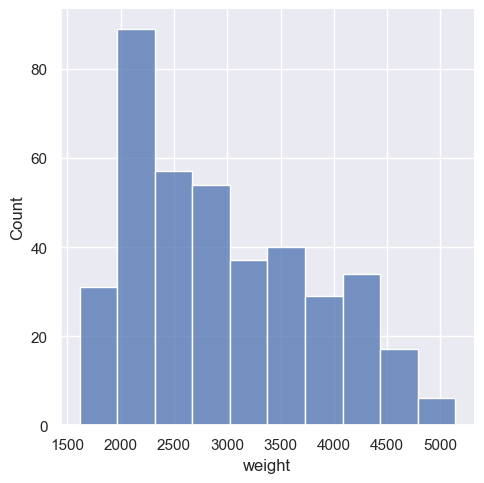

In [57]:
# see distribution
sns.displot(data=mpgFrame, x='weight')

<AxesSubplot:xlabel='weight'>

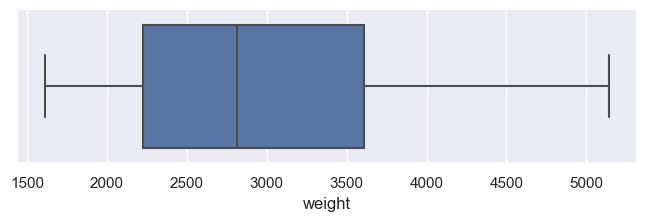

In [58]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='weight')

Observations: Unimodel, right skew. Mean Approx. 2970.22 & Standard Deviation Approx. 844.93. Min - 1613, Max - 5140. No outliers.

##### Acceleration

In [59]:
# descriptive stats
mpgFrame['acceleration'].describe()

count    394.000000
mean      15.549949
std        2.704007
min        8.740000
25%       13.800000
50%       15.500000
75%       17.175000
max       22.240000
Name: acceleration, dtype: float64

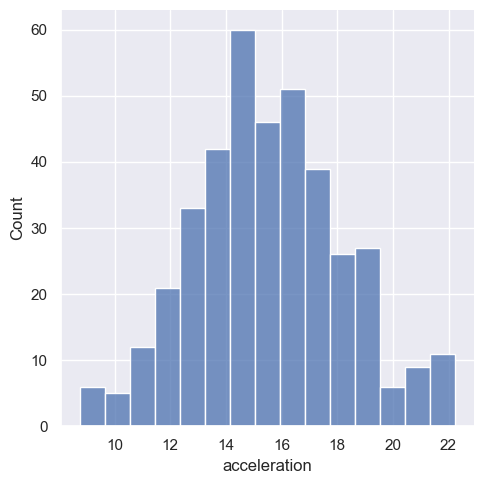

In [60]:
# see distribution
sns.displot(data=mpgFrame, x='acceleration')

<AxesSubplot:xlabel='acceleration'>

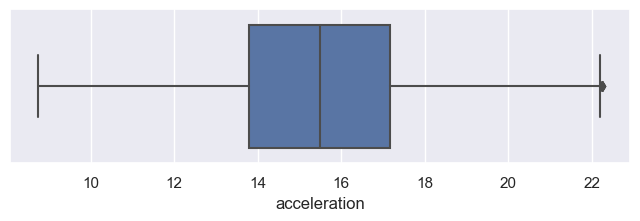

In [61]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='acceleration')

Observations: All those dots by 22 on the box and whisker plot show when I capped the outliers. The distribution is approximetly Normal. Mean Approx. 15.4, Standard Deviation Approx. 2.7. Min - 8.74, Max - 22.24.

##### Model Year

In [62]:
# descriptive stats
mpgFrame['model year'].describe()

count    394.000000
mean      76.000000
std        3.686161
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model year, dtype: float64

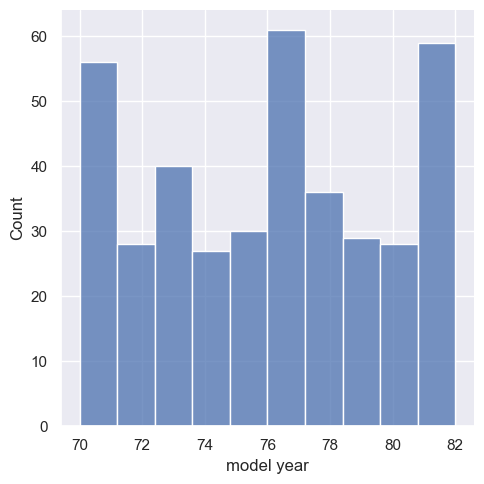

In [63]:
# see distribution
sns.displot(data=mpgFrame, x='model year')

<AxesSubplot:xlabel='model year'>

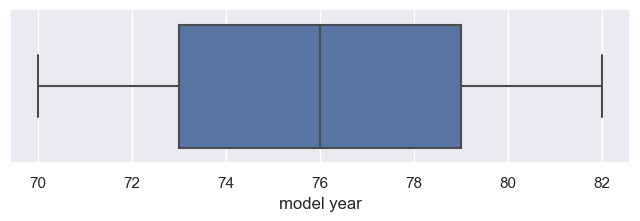

In [64]:
# see IQR, bounds, Outliers
plt.figure(figsize=(8,2))
sns.boxplot(data=mpgFrame, x='model year')

Observations: At first the data looks to be trimodel but after a close look, it is unimodel. It has a Mean of 76 & Standard Deviation of Approx. 3.7. Min - 70, Max - 82. No outliers.

## Multivairate Analysis

<AxesSubplot:>

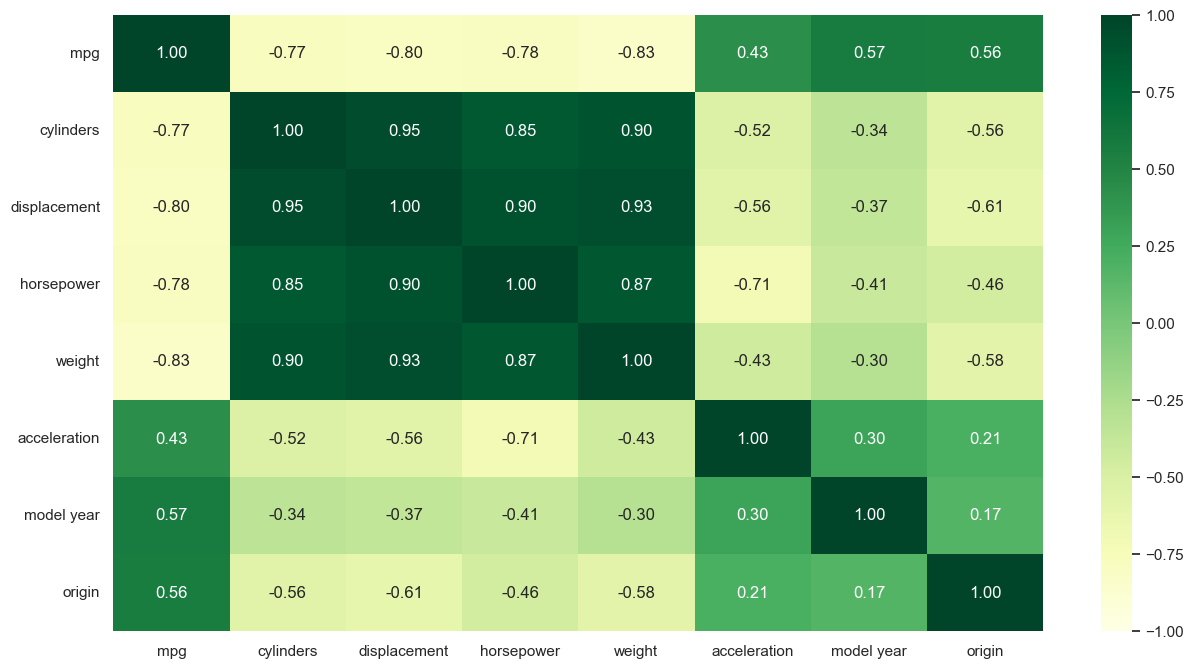

In [65]:
# heatmap to visualize correlation
plt.figure(figsize=(15, 8))
sns.heatmap(mpgFrame.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGn")

Observations: Most values have strong negative or positive correlation with another. This is good to predict MPG as each category brings some predictability to the table

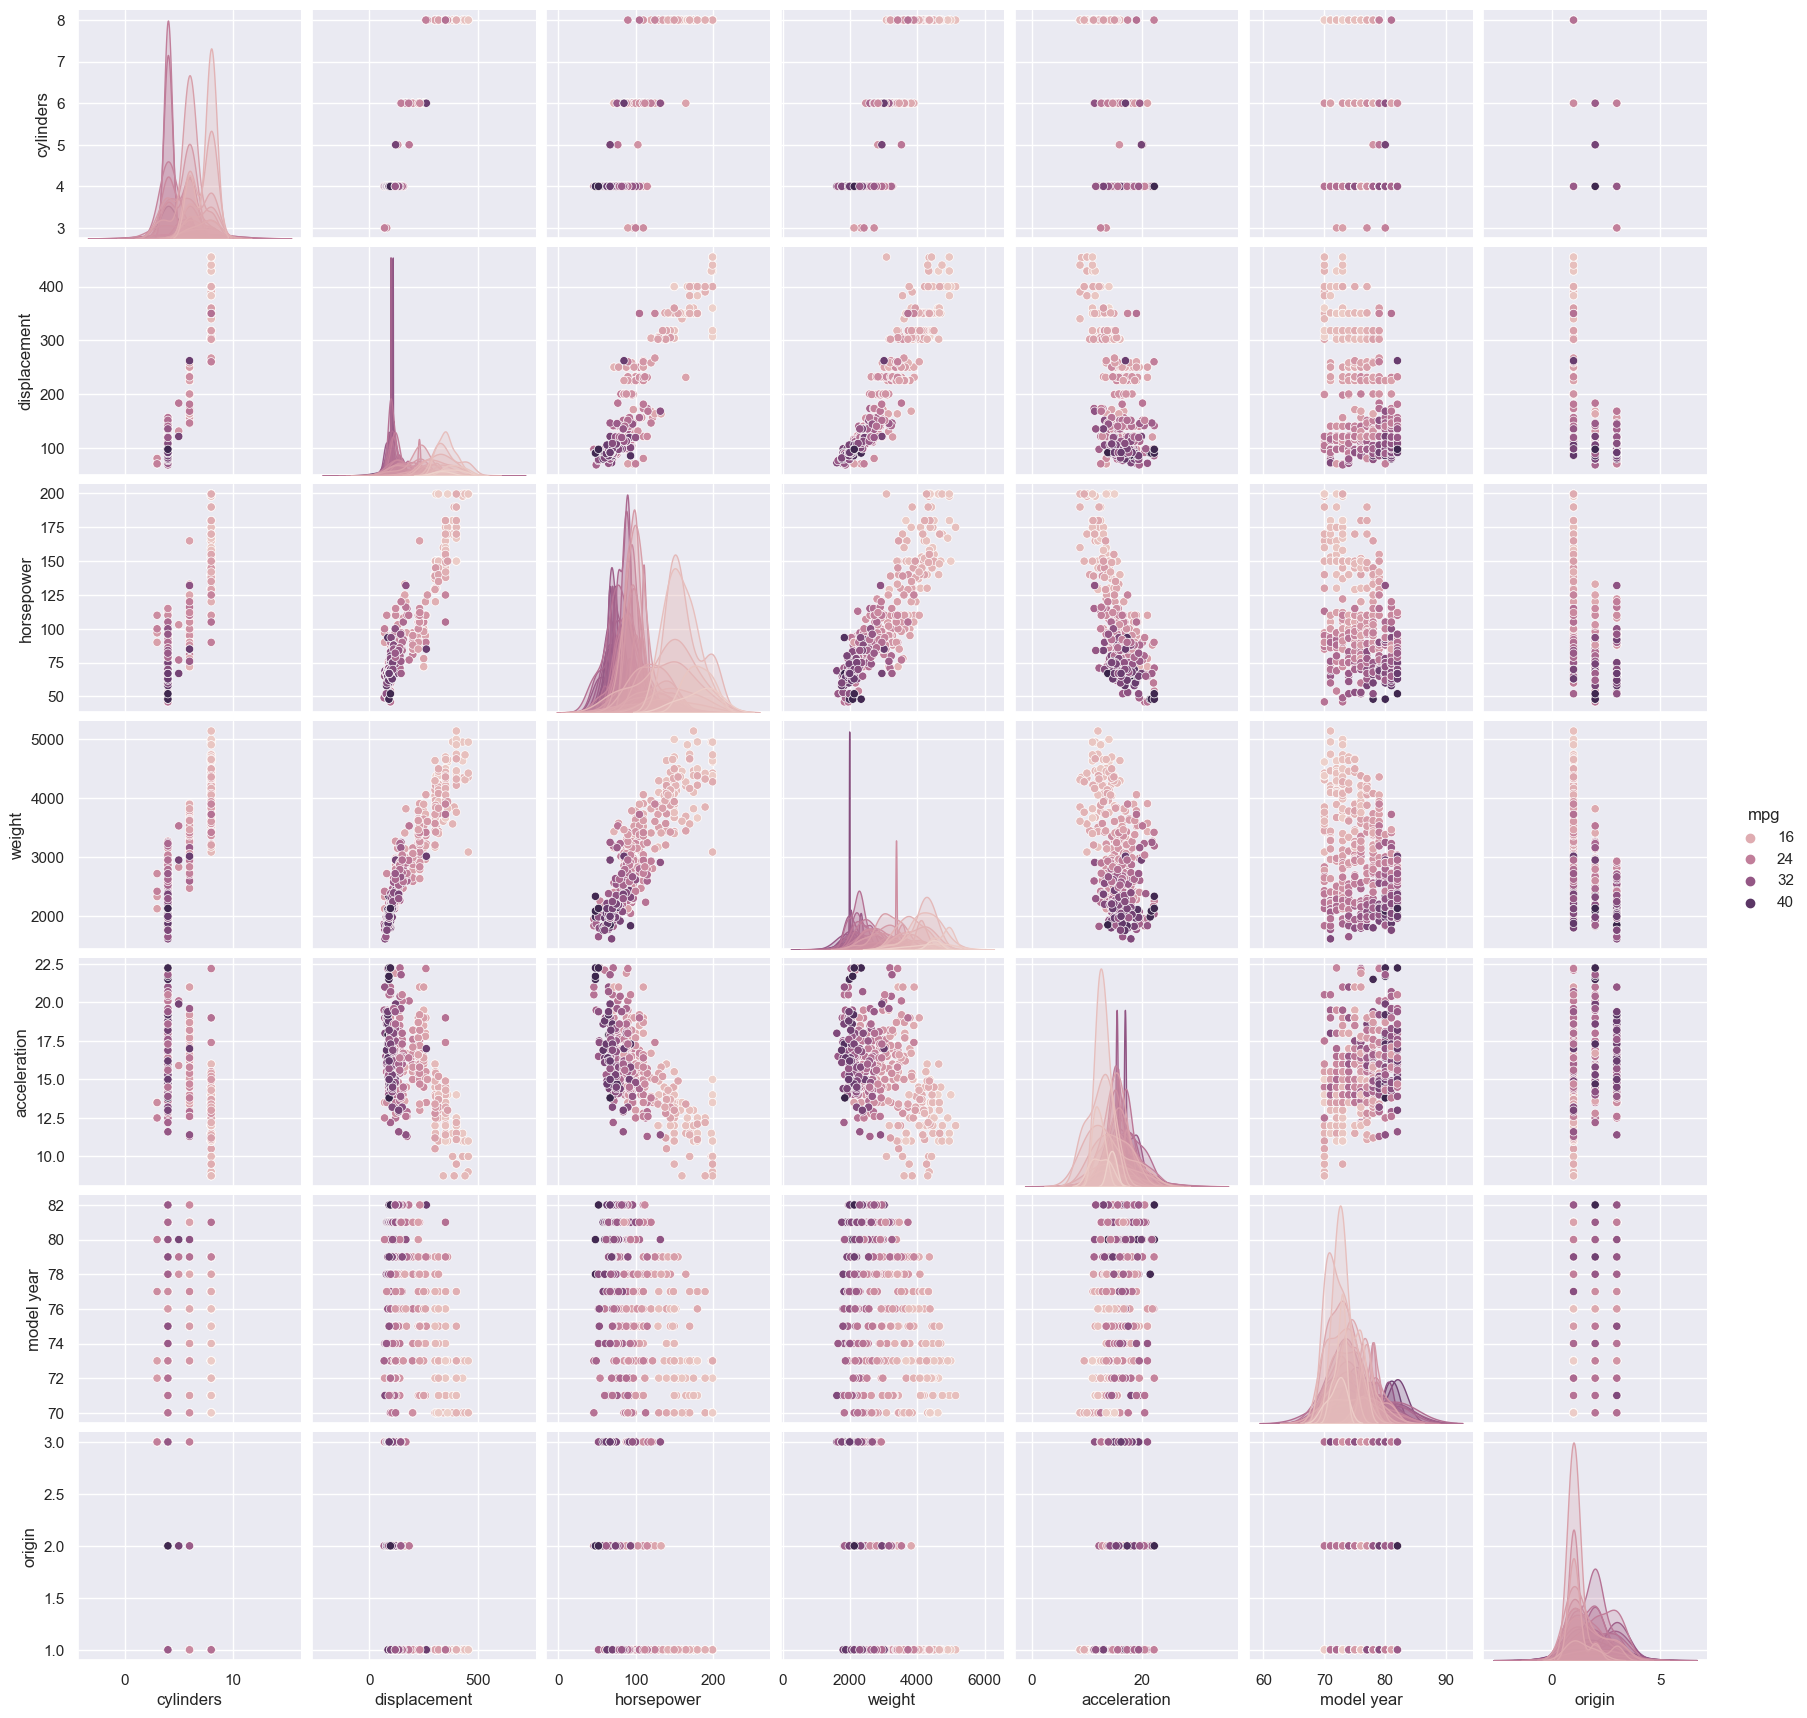

In [66]:
# loads of graphs
sns.pairplot(data=mpgFrame,hue='mpg')

Observations: The lighter the color, the less the MPG. It looks like the lighter the car is, the better miles per gallon it gets. It also seems that the lower the horsepower, the higher the miles per gallon. (+ Weight = - MPG, - Horsepower = + MPG)

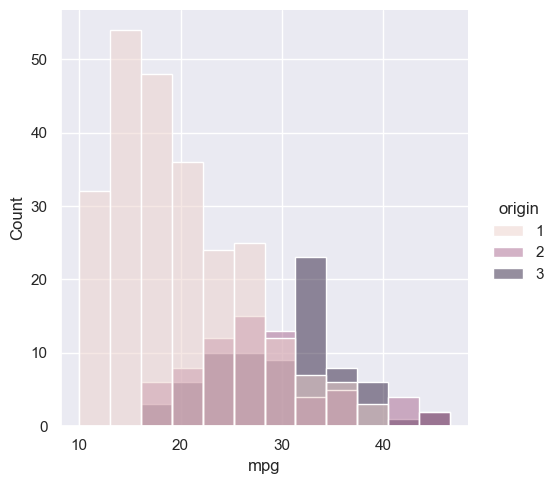

In [67]:
sns.displot(data=mpgFrame, x='mpg', hue='origin')

Observation: American cars have the worst miles per gallon count

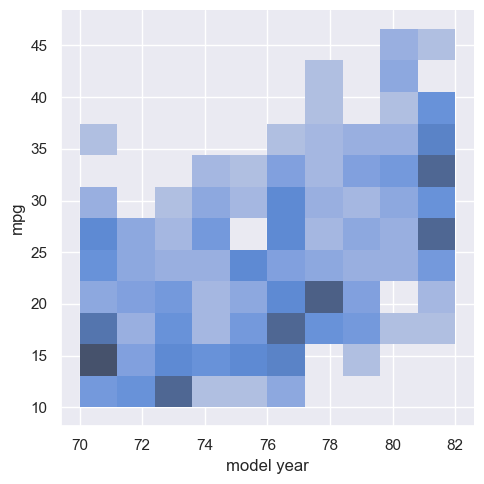

In [68]:
sns.displot(data=mpgFrame, x='model year', y='mpg')

Observation: The miles per gallon trended upwards once the model year got towards the 80's.

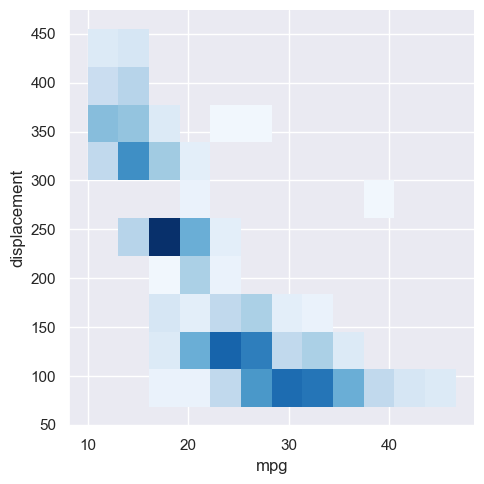

In [69]:
sns.displot(data=mpgFrame, x='mpg', y='displacement', cmap="Blues")

Observation: Lower the displacement, generally, higher the gas milleage.

#### MPG + 'X Column' Stats

In [70]:
# find mean mpg from car brands
mpgFrame.groupby('car name')['mpg'].mean().sort_values(ascending=False)

car name
Honda         33.761538
Renault       32.880000
Volkswagen    31.840909
Datsun        31.113043
Subaru        30.525000
Mazda         30.058333
Fiat          28.912500
Toyota        28.165385
Audi          26.714286
Opel          25.750000
Mercedes      23.966667
Saab          23.900000
BMW           23.750000
Peugeot       23.687500
Dodge         22.060714
Plymouth      21.703226
Volvo         21.116667
Oldsmobile    21.100000
Chevrolet     20.219149
Pontiac       20.012500
Cadillac      19.750000
Ford          19.694118
Buick         19.182353
Mercury       19.118182
AMC           18.246429
Chrysler      17.266667
Name: mpg, dtype: float64

Observation: It looks like Honda has cars with the best miles per gallon while Chrysler has the worst.

In [71]:
# mpg based on cylinders
mpgFrame.groupby('cylinders')['mpg'].mean().sort_values(ascending=False)

cylinders
4    29.246269
5    27.366667
3    20.550000
6    19.985714
8    15.021569
Name: mpg, dtype: float64

In [72]:
# mpg based on 
mpgFrame.groupby('horsepower')['mpg'].mean().sort_values(ascending=False)

horsepower
48.00     43.600000
64.00     39.000000
58.00     37.550000
66.00     36.100000
65.00     35.480000
            ...    
175.00    13.400000
160.00    13.000000
158.00    13.000000
199.62    12.636364
167.00    12.000000
Name: mpg, Length: 87, dtype: float64

Observation: These stats aid my previous observations from the graphs above. Lower horsepower = higher mpg. Lower cylinders = higher mpg.

## Two Graphs From Python Graph Gallery

<AxesSubplot:xlabel='displacement', ylabel='weight'>

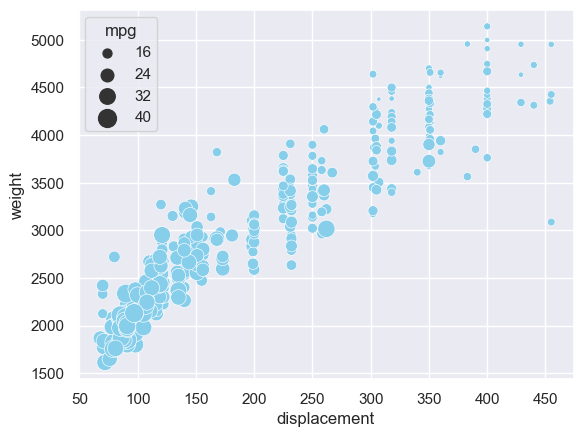

In [73]:
# bubble plot from website
sns.scatterplot(data=mpgFrame, x='displacement', y='weight', size='mpg',sizes=(10,200), color='skyblue')

Observation: Displacement & Weight have the same effect on miles per gallon. I can tell this because all the large bubbles are near the bottom left.

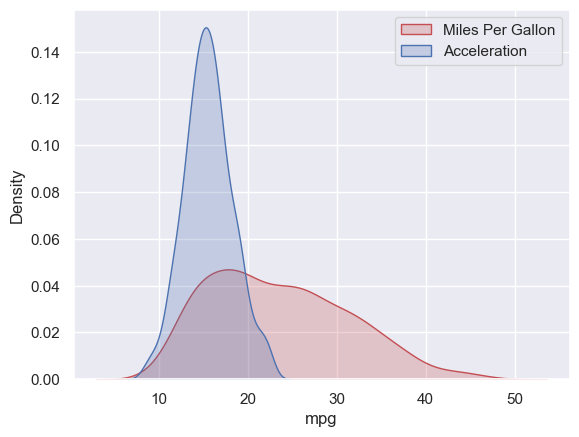

In [74]:
# plotting both distibutions on the same figure
fig = sns.kdeplot(mpgFrame['mpg'], shade=True, color="r", label='Miles Per Gallon')
fig = sns.kdeplot(mpgFrame['acceleration'], shade=True, color="b", label='Acceleration')
plt.legend()
plt.show()

Observations: Acceleration is positivley correlated with MPG so the two vaguely model another. 

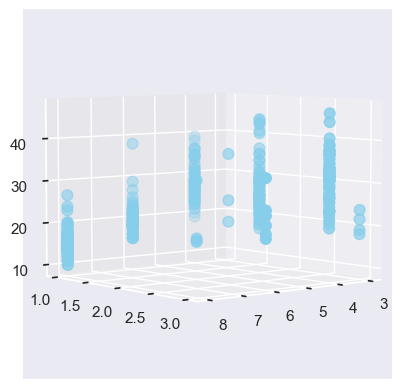

In [75]:
# This graph tells me nothing but I just thought it was cool

from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mpgFrame['cylinders'], mpgFrame['origin'], mpgFrame['mpg'], c='skyblue', s=60)
ax.view_init(5, 50)
plt.show()


Observation: I hope to work this graph into my assingments in the future

## Conclusions & Recomendations

Sorting the car names by brand did end up telling me something. Hopefully from this data, if only a car brand was given, it would be easy to identify outliers. For example, a car is given with weight and horsepower. We may be able to identify what car brand category that may best fit. That could aid in the estimation of miles per gallon.

Many of the columns in the data have indirect variation with miles per gallon. This means that as one goes up, the other goes down. The variables that can be put in this relationship category are Horsepower, Weight, Cylinders, & Displacement. 

The columns Acceleration & Model Year could be used to predict miles per gallon with more certainty, but I would not reccomend using them as a starting point. This is because sometimes, these categories had little effect on miles per gallon. For example, the Model Year column didn't start having a trend until the mid 70's. In the future, I'm not certain that these columns would be missed all that much.

The Origin column surprised me a bit. This column could be used as another honing method to aid in precision predictability. American cars seemed to be the worst out of the group while Asians seemed to be the best. This is in terms of miles per gallon of course. 

___

# ARTI 350 Start

## Feature Engineering

In [76]:
# droppign the 'car name column'
df = mpgFrame.drop('car name', axis=1)

### One Hot Encoding of Origin

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
# looking at possible values
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [79]:
#Data Frame with One Hot Encoding 
binaryRepresention = pd.get_dummies(df['origin'])

# Adding the One Hot Encoding in
df = pd.concat([df, binaryRepresention], axis=1)

In [80]:
# dropping 'origin' since now redundant
df = df.drop('origin', axis=1)

In [81]:
# changing the column names to what they should be
df = df.rename(columns={1: 'America'})
df = df.rename(columns={2: 'Europe'})
df = df.rename(columns={3: 'Asia'})

### Changing DataTypes

In [82]:
# initial view
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
America           uint8
Europe            uint8
Asia              uint8
dtype: object

In [83]:
# America to Object
df['America'] = df['America'].astype(object)

# Europe to Object
df['Europe'] = df['Europe'].astype(object)

# Asia to Object
df['Asia'] = df['Asia'].astype(object)

# Horsepower to Int
df['horsepower'] = df['horsepower'].astype(int)

## Dropping Europe

In [84]:
df = df.drop('Europe', axis=1)

# Model Building

#### Prep

In [85]:
# importing the libraries 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [86]:
# another library
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas.util.testing as tm

In [87]:
# Independent
X = df.drop('mpg', axis =1)
# Dependent
y = df[['mpg']]

#### Split

In [88]:
# 7 to 3 ratio split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [89]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### Regression Model 1

In [90]:
# Coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.03562782013251266
The coefficient for displacement is 0.02333536360269201
The coefficient for horsepower is -0.022947159290222806
The coefficient for weight is -0.007083687107283163
The coefficient for acceleration is 0.11092574811000376
The coefficient for model year is 0.7674983364082459
The coefficient for America is -3.050714216272268
The coefficient for Asia is 0.005445511846437867


In [91]:
# Y intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -15.581031832171675


In [92]:
regression_model.score(X_train, y_train)

0.8229260029214946

In [93]:
#out of sample score (R^2)
regression_model.score(X_test, y_test)

0.8172558356250132

### Interaction Terms

In [94]:
# more libraries 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [95]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [96]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

In [97]:
y_pred = poly_clf.predict(X_test2)

In [98]:
#print(y_pred)
#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)


0.7153903815089233
0.6088013305647668
(275, 8)
(275, 37)


__Model 1 Summary:__ Train scored better than the test. Interaction terms far from 0. 

### Model 2

#### Changes

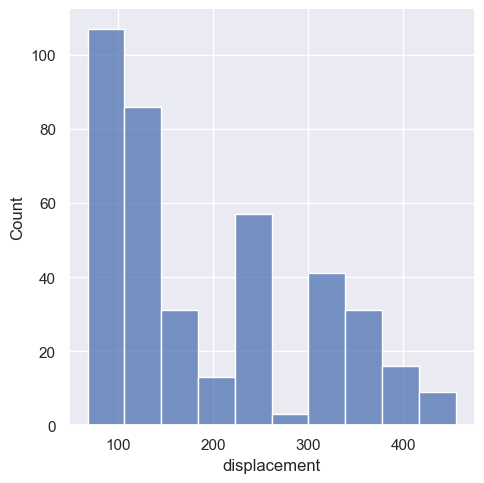

In [99]:
sns.displot(data=df, x='displacement')

> Comment: Log transformation because data is skewed right

In [100]:
# log transformation
df['displacement'] = np.log(df['displacement'])

#### Model

In [101]:
# Independent
X = df.drop('mpg', axis =1)
# Dependent
y = df[['mpg']]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [103]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is 1.1025242235024935
The coefficient for displacement is -4.310208558923298
The coefficient for horsepower is -0.019679020642657582
The coefficient for weight is -0.0047083693829573885
The coefficient for acceleration is 0.0019861017626603074
The coefficient for model year is 0.7323442935352475
The coefficient for America is -1.6377092001643399
The coefficient for Asia is 0.09192469033517475


> Comment: Coefficents got bigger

In [105]:
# Y intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.8340313305884237


> Comment: Y intercept got bigger too

In [106]:
regression_model.score(X_train, y_train)

0.82347656493825

> Comment: Score got bigger in the thousandths place

In [107]:
#out of sample score (R^2)
regression_model.score(X_test, y_test)

0.8201731960171809

> Comment: Score got bigger in the hunderdths place

#### Interaction Terms

In [108]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [109]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

In [110]:
y_pred = poly_clf.predict(X_test2)

In [111]:
#print(y_pred)
#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

0.9029408985748538
0.8702362832211545
(275, 8)
(275, 37)



> Comment: Got worse from .71 to .9 on train. Worse on .6 to .87. 

__Model 2 Summary:__ The Y intercept for this model became positive. Before it was roughly -15. The regression scores got a little bit better for both the train and the test. The interaction terms became further from zero but the test was closer.

### Model 3

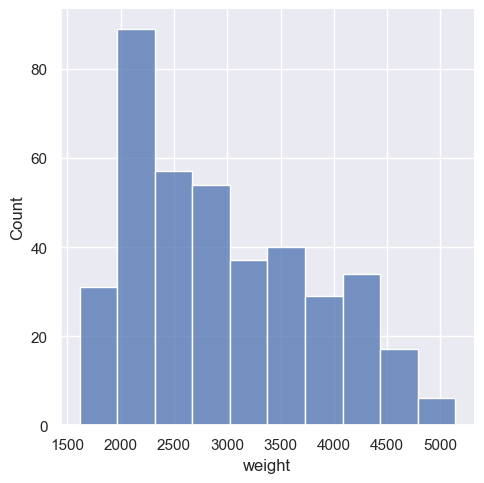

In [112]:
sns.displot(data=df, x= 'weight')

> Comment: Data has right skew and log transformation worked last time. May as well try again.

In [113]:
# log transformation
df['weight'] = np.log(df['weight'])

In [114]:
# Independent
X = df.drop('mpg', axis =1)
# Dependent
y = df[['mpg']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [116]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [117]:
# Coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is 0.5750419080235454
The coefficient for displacement is -0.1926043950069115
The coefficient for horsepower is -0.007805492391158501
The coefficient for weight is -19.446141518871993
The coefficient for acceleration is 0.10300271623138695
The coefficient for model year is 0.7838985417421531
The coefficient for America is -2.08074674800114
The coefficient for Asia is -0.2824942985876104


> Comment: Coefficients got smaller

In [118]:
# Y intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 117.02132938416452


> Comment: Y intercept jumped a little more than 100

In [119]:
regression_model.score(X_train, y_train)

0.8407232465692238

> Comment: Train score imporved by .02

In [120]:
#out of sample score (R^2)
regression_model.score(X_test, y_test)

0.8425703388777095

> Comment: Somehow the test got better than the train.

#### Interaction Terms

In [121]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [122]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

In [123]:
y_pred = poly_clf.predict(X_test2)

In [124]:
#print(y_pred)
#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

-0.23132785892937058
-0.9785002924124349
(275, 8)
(275, 37)


> Train score closest to zero is has ever been. Test score farther from zero.

__Model 3 Summary:__ The Y intercept went up by about 100. The coefficients got smaller. The regression scores improved for both the test and the train. The test actually had a better score than the train. When it came to the interaction terms, the train was very close to zero while the test was very far away.

### Model 4

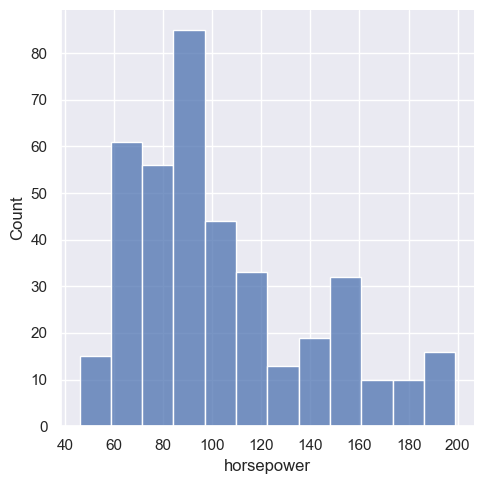

In [128]:
sns.displot(data=df, x='horsepower')

> Comment: This model has some skew. Log transformation it is.

In [130]:
# log transformation
df['horsepower'] = np.log(df['horsepower'])

#### model

In [135]:
# Independent
X = df.drop('mpg', axis =1)
# Dependent
y = df[['mpg']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [137]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [138]:
# Coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is 0.5457927464529085
The coefficient for displacement is -0.8437445445056665
The coefficient for horsepower is -31.75555915311243
The coefficient for weight is -13.357388339034932
The coefficient for acceleration is -0.20772412138820717
The coefficient for model year is 0.738165548573622
The coefficient for America is -1.6939497529235188
The coefficient for Asia is 0.1443670501642121


> Comment: Coefficients went down a bit

In [139]:
# Y intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 127.45962851964865


> Comment: Y intercept jumped 10

In [140]:
regression_model.score(X_train, y_train)

0.8488854408818924

> Comment: Thousandths place improvement

In [141]:
#out of sample score (R^2)
regression_model.score(X_test, y_test)

0.8515121935284526

> Comment: Hunderdths place improvement, test still better than train.

#### Interaction Terms

In [142]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

In [143]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

In [144]:
y_pred = poly_clf.predict(X_test2)

In [145]:
#print(y_pred)
#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

0.7448248540052673
0.6008110275084133
(275, 8)
(275, 37)


> Comment: Change from negative to positve, test closer to zero.

__Model 4 Summary:__ Interaction terms were about the same as model 1, the train being further from zero while the test being closer. Y intercept climbed 10 more digits. The scores for both the test and train got better while the test is still scored better.